## **KELOMPOK 3 SAINS DATA 2023E**
### **1. HIZKIA MARVEL ABHINAYA (23031554061)**
### **2. ANDREAS SETIANDI SIMORANGKIR (23031554200)**
### **3. MUHAMAD ALFA REZA GOBEL (23031554207)**

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import numpy as np
from skimage.feature import hog, local_binary_pattern
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

### **LOAD DATA TRAIN & EDA**

In [2]:
base_path = r"D:/TUGAS KAMPUS SEMESTER 4/PENGOLAHAN CITRA DIGITAL/PROYEK AKHIR PCD/DATA SET PCD/TRAIN DATA"
total_real = 0
total_forge = 0

for dataset_folder in os.listdir(base_path):
    dataset_path = os.path.join(base_path, dataset_folder)
    if os.path.isdir(dataset_path):
        real_path = os.path.join(dataset_path, "real")
        forge_path = os.path.join(dataset_path, "forge")

        if os.path.exists(real_path):
            real_images = [f for f in os.listdir(real_path) if os.path.isfile(os.path.join(real_path, f))]
            total_real += len(real_images)
        if os.path.exists(forge_path):
            forge_images = [f for f in os.listdir(forge_path) if os.path.isfile(os.path.join(forge_path, f))]
            total_forge += len(forge_images)

total_images = total_real + total_forge

print(f"Total gambar REAL  : {total_real}")
print(f"Total gambar FORGE : {total_forge}")
print(f"Total KESELURUHAN  : {total_images}")

Total gambar REAL  : 360
Total gambar FORGE : 360
Total KESELURUHAN  : 720


## **PREPROCESSING**

In [3]:
def preprocess_signature(image):
    results = {}
    results['0. Original'] = image.copy()

    inverted = cv2.bitwise_not(image)
    results['1. Inversion'] = inverted

    scaled = cv2.resize(inverted, (256, 128))
    results['2. Scaled'] = scaled

    denoised = cv2.GaussianBlur(scaled, (5, 5), 0)
    results['3. Denoised'] = denoised

    gray = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY)
    norm_gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)
    results['4. Normalized (Gray)'] = norm_gray

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(norm_gray)
    results['5. CLAHE'] = enhanced

    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(enhanced, cv2.MORPH_CLOSE, kernel)
    results['6. Morph. Closing'] = morph

    _, binary = cv2.threshold(morph, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    black = np.sum(binary == 0)
    white = np.sum(binary == 255)
    if black > white:
        binary = cv2.bitwise_not(binary)
    results['7. Binarized'] = binary

    return results

In [4]:
real_processed_count = 0
forge_processed_count = 0

processed_real_all = []
processed_forge_all = []

for folder in os.listdir(base_path):
    dataset_path = os.path.join(base_path, folder)
    if not os.path.isdir(dataset_path):
        continue
    print(f"Memproses: {folder}")

    path_real = os.path.join(dataset_path, "real")
    path_forge = os.path.join(dataset_path, "forge")

    if not os.path.exists(path_real) or not os.path.exists(path_forge):
        continue

    real_files = sorted([f for f in os.listdir(path_real) if os.path.isfile(os.path.join(path_real, f))])
    forge_files = sorted([f for f in os.listdir(path_forge) if os.path.isfile(os.path.join(path_forge, f))])

    for fname in real_files:
        img = cv2.imread(os.path.join(path_real, fname))
        if img is not None:
            processed_real_all.append(preprocess_signature(img))
            real_processed_count += 1  

    for fname in forge_files:
        img = cv2.imread(os.path.join(path_forge, fname))
        if img is not None:
            processed_forge_all.append(preprocess_signature(img))
            forge_processed_count += 1  


Memproses: dataset1
Memproses: dataset2
Memproses: dataset3
Memproses: dataset4


In [5]:
print(f"Total gambar REAL yang diproses  : {real_processed_count}")
print(f"Total gambar FORGE yang diproses : {forge_processed_count}")

Total gambar REAL yang diproses  : 360
Total gambar FORGE yang diproses : 360


REAL SIGNATURE


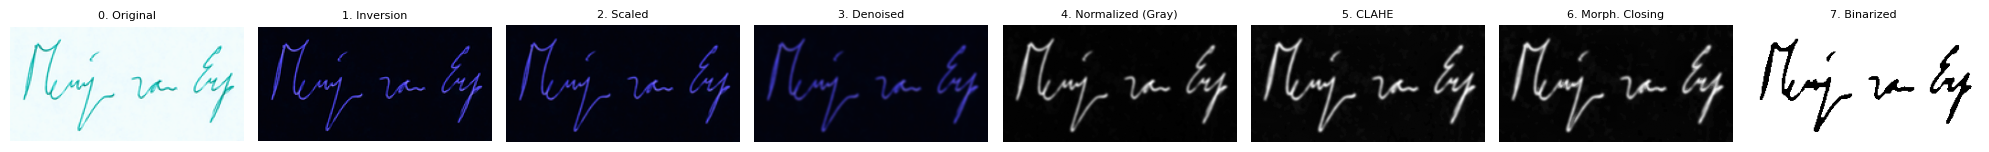

FORGED SIGNATURE


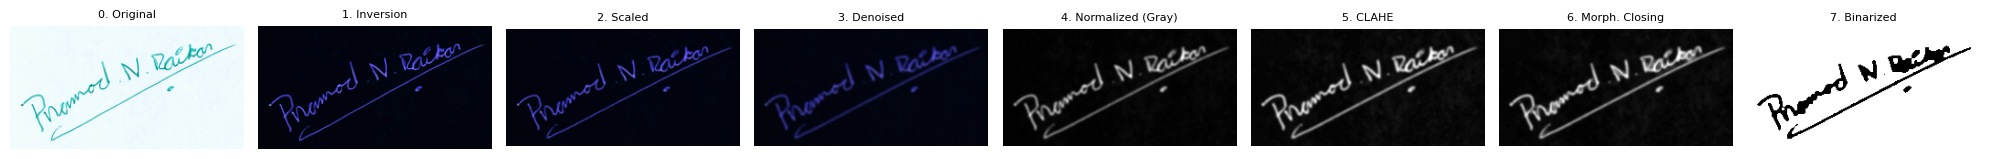

In [6]:
import matplotlib.pyplot as plt

def display_preprocessing_results(processed, title_prefix=""):
    stages = list(processed.keys())
    num_stages = len(stages)

    plt.figure(figsize=(20, 3))
    for i, stage in enumerate(stages):
        plt.subplot(1, num_stages, i+1)
        img = processed[stage]

        if stage == '0. Original' and len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            cmap = None
        elif len(img.shape) == 2: 
            cmap = 'gray'
        else:  
            cmap = None

        plt.imshow(img, cmap=cmap)
        plt.title(f"{title_prefix}{stage}", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Menampilkan contoh gambar pertama dari dataset pertama
if processed_real_all and processed_forge_all:
    print("REAL SIGNATURE")
    display_preprocessing_results(processed_real_all[1], title_prefix="")

    print("FORGED SIGNATURE")
    display_preprocessing_results(processed_forge_all[1], title_prefix="")
else:
    print("Tidak ada data untuk ditampilkan.")


### **SIMPAN HASIL PREPROCESSING**

In [7]:
# output_real_path = r"D:/TUGAS KAMPUS SEMESTER 4/PENGOLAHAN CITRA DIGITAL/PROYEK AKHIR PCD/DATA SET PCD/OUTPUT REAL"
# output_forge_path = r"D:/TUGAS KAMPUS SEMESTER 4/PENGOLAHAN CITRA DIGITAL/PROYEK AKHIR PCD/DATA SET PCD/OUTPUT FORGE"

# os.makedirs(output_real_path, exist_ok=True)
# os.makedirs(output_forge_path, exist_ok=True)

# for idx, result_dict in enumerate(processed_real_all):
#     final_img = result_dict['7. Binarized']
#     original_filename = f"real_image_{idx+1}.png" 
#     filename = f"{original_filename.split('.')[0]}_{idx+1}.png" 
#     output_path = os.path.join(output_real_path, filename)
#     cv2.imwrite(output_path, final_img) 

# for idx, result_dict in enumerate(processed_forge_all):
#     final_img = result_dict['7. Binarized']
#     original_filename = f"forge_image_{idx+1}.png" 
#     filename = f"{original_filename.split('.')[0]}_{idx+1}.png" 
#     output_path = os.path.join(output_forge_path, filename)

#     cv2.imwrite(output_path, final_img) 

### **NORMALISASI**

In [8]:
output_real_path = r"D:/TUGAS KAMPUS SEMESTER 4/PENGOLAHAN CITRA DIGITAL/PROYEK AKHIR PCD/DATA SET PCD/OUTPUT REAL"
output_forge_path = r"D:/TUGAS KAMPUS SEMESTER 4/PENGOLAHAN CITRA DIGITAL/PROYEK AKHIR PCD/DATA SET PCD/OUTPUT FORGE"

def normalize_image(image):
    if image is not None:
        return image / 255.0
    else:
        return None

def process_images_in_folder(folder_path, folder_name):
    normalized_count = 0
    all_files = os.listdir(folder_path)
    valid_images = [filename for filename in all_files if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for filename in valid_images:
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            if image.shape[-1] == 4:
                image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

            normalized_image = normalize_image(image)
            
            if normalized_image is not None:
                normalized_count += 1 
    return normalized_count

real_count = process_images_in_folder(output_real_path, "REAL")
forge_count = process_images_in_folder(output_forge_path, "FORGE")
total_normalized = real_count + forge_count

print(f"Total images successfully normalized in REAL: {real_count}")
print(f"Total images successfully normalized in FORGE: {forge_count}")
print(f"Total images successfully normalized from both folders: {total_normalized}")


Total images successfully normalized in REAL: 360
Total images successfully normalized in FORGE: 360
Total images successfully normalized from both folders: 720


## **FEATURE EXTRACTION**

In [9]:
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(folder_path, filename)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
            if img is not None:
                images.append(img)
    return images

def extract_features(image):
    image = cv2.resize(image, (128, 64))

    hog_features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9, block_norm='L2-Hys', visualize=False)

    moments = cv2.moments(image)
    hu_moments = cv2.HuMoments(moments).flatten()
    hu_moments = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10)

    return np.concatenate([hog_features, hu_moments])

cropped_real = load_images_from_folder(output_real_path)
cropped_forge = load_images_from_folder(output_forge_path)

features_real = [extract_features(img) for img in cropped_real]
features_forge = [extract_features(img) for img in cropped_forge]

all_features = np.vstack(features_real + features_forge)

labels = np.array([1]*len(features_real) + [0]*len(features_forge))

pca = PCA(n_components=50)
features_pca = pca.fit_transform(all_features)

print("Jumlah total fitur awal (HOG + Hu Moments):", all_features.shape[1])
print("Jumlah fitur setelah PCA:", features_pca.shape[1])
print("Contoh fitur setelah PCA (baris pertama):\n", features_pca[0])


Jumlah total fitur awal (HOG + Hu Moments): 3787
Jumlah fitur setelah PCA: 50
Contoh fitur setelah PCA (baris pertama):
 [ 2.18111649e+00 -1.04224675e+01 -1.57130835e+01  1.01078109e+00
 -1.10501066e+00  9.79356876e-01  1.13706391e+00  1.68366253e+00
 -2.14138772e-01 -4.38117346e-01  4.64446058e-01  1.27615279e+00
  6.04515216e-01 -1.20381952e+00  3.92973191e-01 -1.10569796e+00
  4.51132035e-01  5.68150103e-01 -5.30909676e-01  7.98708912e-01
  8.68821002e-01  5.11723910e-01  4.10692411e-01 -1.65920546e+00
  3.25706377e-01  4.73791355e-01  6.59685904e-01 -7.93017447e-01
 -3.08341129e-01 -3.34903416e-01 -9.45009386e-01  4.33996697e-01
  2.48028712e-01  4.43049188e-01  5.14390728e-01 -4.02251303e-01
 -5.95698379e-01  2.37427225e-01 -3.44140404e-01 -7.17299206e-01
 -2.73357186e-01  3.36852631e-01  7.27938162e-01  1.19171625e-02
 -4.62594531e-02  1.93010092e-01 -6.44131118e-01  5.33726216e-01
  2.24193361e-01  1.85471840e-01]


## **PEMODELAN ANN (BACKPROPAGATION)**

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5315 - loss: 0.7886 - val_accuracy: 0.6528 - val_loss: 0.6366
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6682 - loss: 0.6116 - val_accuracy: 0.6667 - val_loss: 0.5870
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - loss: 0.6029 - val_accuracy: 0.7083 - val_loss: 0.5539
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7627 - loss: 0.5041 - val_accuracy: 0.7431 - val_loss: 0.5154
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7695 - loss: 0.5077 - val_accuracy: 0.7847 - val_loss: 0.4792
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8087 - loss: 0.4290 - val_accuracy: 0.7847 - val_loss: 0.4774
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7933 - loss: 0.4495 - val_accuracy: 0.7986 - val_loss: 0.4570
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8137 - loss: 0.3908 - val_accuracy: 0.8333 - val_loss:

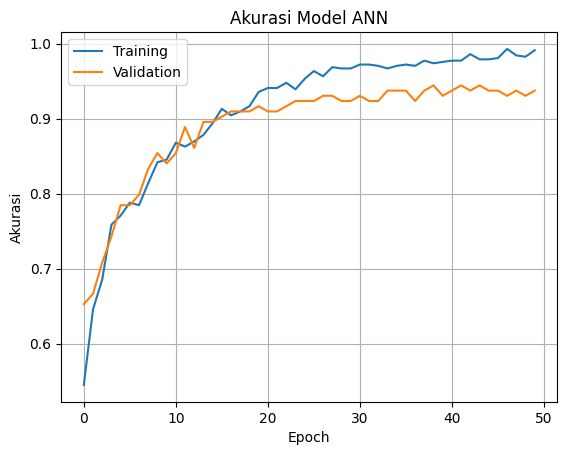

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(features_pca, labels, test_size=0.2, random_state=42, stratify=labels)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_split.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_split, y_train_split,epochs=50,batch_size=16,validation_data=(X_val_split, y_val_split),verbose=1)

y_val_pred = model.predict(X_val_split).round()

print("\nClassification Report pada data validasi:")
print(classification_report(y_val_split, y_val_pred, target_names=['FORGE (0)', 'REAL (1)']))

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Akurasi Model ANN')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)
plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


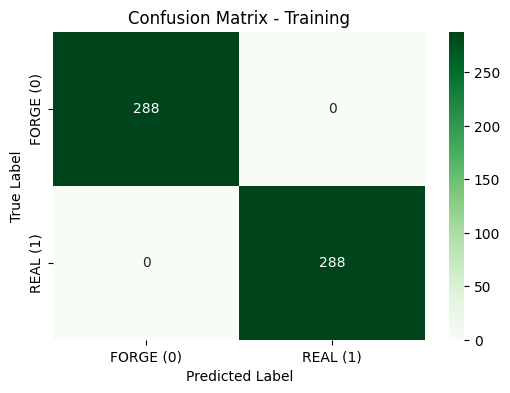

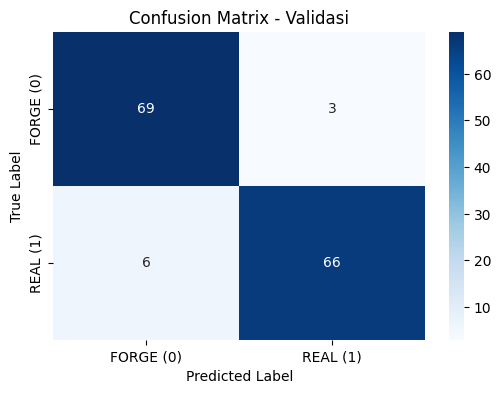

Confusion Matrix - Training:
 [[288   0]
 [  0 288]]
Confusion Matrix - Validasi:
 [[69  3]
 [ 6 66]]


In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_train_pred = model.predict(X_train_split).round()
y_val_pred = model.predict(X_val_split).round()

cm_train = confusion_matrix(y_train_split, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens',xticklabels=['FORGE (0)', 'REAL (1)'],yticklabels=['FORGE (0)', 'REAL (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Training')
plt.show()

cm_val = confusion_matrix(y_val_split, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',xticklabels=['FORGE (0)', 'REAL (1)'],yticklabels=['FORGE (0)', 'REAL (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Validasi')
plt.show()

print("Confusion Matrix - Training:\n", cm_train)
print("Confusion Matrix - Validasi:\n", cm_val)


## **UJI MODEL ANN DENGAN DATA TEST**

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

[Classification Report - Data Test]
              precision    recall  f1-score   support

   FORGE (0)       0.98      1.00      0.99       150
    REAL (1)       1.00      0.98      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



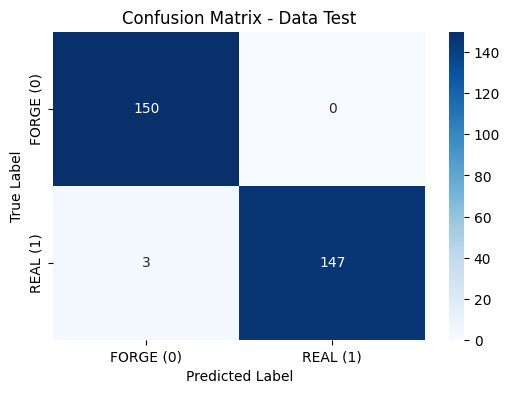

In [12]:
def load_and_process_images(folder_path):
    features = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(folder_path, filename)
            img = cv2.imread(path)
            if img is None:
                continue
            processed_dict = preprocess_signature(img)
            binarized_img = processed_dict['7. Binarized']
            binarized_img = cv2.resize(binarized_img, (128, 64))

            hog_feat = hog(binarized_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                           orientations=9, block_norm='L2-Hys', visualize=False)

            moments = cv2.moments(binarized_img)
            hu_moments = cv2.HuMoments(moments).flatten()
            hu_moments = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10)
            combined_feat = np.concatenate([hog_feat, hu_moments])
            features.append(combined_feat)
    return np.array(features)

output_real_path_test = r"D:/TUGAS KAMPUS SEMESTER 4/PENGOLAHAN CITRA DIGITAL/PROYEK AKHIR PCD/DATA SET PCD/TEST DATA/real"
output_forge_path_test = r"D:/TUGAS KAMPUS SEMESTER 4/PENGOLAHAN CITRA DIGITAL/PROYEK AKHIR PCD/DATA SET PCD/TEST DATA/forge"

features_real_test = load_and_process_images(output_real_path_test)
features_forge_test = load_and_process_images(output_forge_path_test)

features_test = np.vstack((features_real_test, features_forge_test))
labels_test = np.array([1]*len(features_real_test) + [0]*len(features_forge_test))

features_test_pca = pca.transform(features_test)

y_test_pred = model.predict(features_test_pca).round()

print("\n[Classification Report - Data Test]")
print(classification_report(labels_test, y_test_pred, target_names=["FORGE (0)", "REAL (1)"]))

cm = confusion_matrix(labels_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["FORGE (0)", "REAL (1)"],yticklabels=["FORGE (0)", "REAL (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Test")
plt.show()

### **UJI ANN PAKAI TANDA TANGAN YANG DIINPUTKAN**

In [13]:
def generate_signature_explanation(image_path, label):
    image_name = image_path.split("/")[-1].split("\\")[-1]
    name_part = image_name.split("-")[1].split(".")[0]  
    maker_id  = name_part[:3]       
    owner_id  = name_part[-3:]      
    status = "asli" if maker_id == owner_id else "palsu"
    penjelasan = (
        f"{image_name} adalah gambar tanda tangan orang nomor {owner_id} "
        f"yang dibuat oleh orang nomor {maker_id}. Ini adalah tanda tangan {status}.")
    return penjelasan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Path gambar: D:/TUGAS KAMPUS SEMESTER 4/PENGOLAHAN CITRA DIGITAL/PROYEK AKHIR PCD/DATA SET PCD/TEST DATA/forge/NFI-00101019.png
Hasil Prediksi ANN: FORGE (0)
Penjelasan ANN: NFI-00101019.png adalah gambar tanda tangan orang nomor 019 yang dibuat oleh orang nomor 001. Ini adalah tanda tangan palsu.


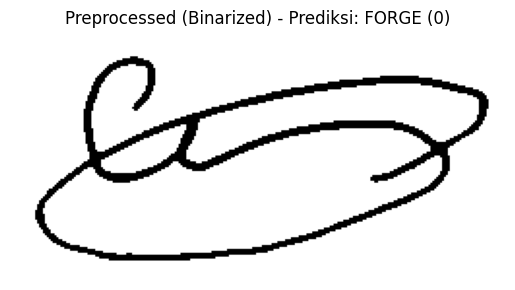

In [14]:
def predict_image_from_path(image_path, pca, model):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Gagal memuat gambar dari path: {image_path}")
        return

    results = preprocess_signature(image)
    bin_img = results['7. Binarized']
    bin_img_resized = cv2.resize(bin_img, (128, 64))

    hog_feat = hog(bin_img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2),orientations=9, block_norm='L2-Hys', visualize=False)
    
    moments = cv2.moments(bin_img_resized)
    hu_moments = cv2.HuMoments(moments).flatten()
    hu_moments = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10)

    combined_feat = np.concatenate([hog_feat, hu_moments])
    combined_feat_pca = pca.transform([combined_feat])

    prediction = model.predict(combined_feat_pca).round().flatten()[0]
    label = "REAL (1)" if prediction == 1 else "FORGE (0)"

    print(f"\nPath gambar: {image_path}")
    print(f"Hasil Prediksi ANN: {label}")
    explanation = generate_signature_explanation(image_path, label)
    print(f"Penjelasan ANN: {explanation}")

    plt.imshow(bin_img, cmap='gray')
    plt.title(f'Preprocessed (Binarized) - Prediksi: {label}')
    plt.axis('off')
    plt.show()

input_path = r"D:/TUGAS KAMPUS SEMESTER 4/PENGOLAHAN CITRA DIGITAL/PROYEK AKHIR PCD/DATA SET PCD/TEST DATA/forge/NFI-00101019.png"

predict_image_from_path(input_path, pca, model)

In [15]:
import numpy as np
import os
import cv2
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split

def preprocess_signature(image):
    results = {}
    results['0. Original'] = image.copy()
    inverted = cv2.bitwise_not(image)
    results['1. Inversion'] = inverted
    scaled = cv2.resize(inverted, (256, 128))
    results['2. Scaled'] = scaled
    denoised = cv2.GaussianBlur(scaled, (5, 5), 0)
    results['3. Denoised'] = denoised
    if len(denoised.shape) == 3: 
        gray = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY)
    else: 
        gray = denoised
    norm_gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)
    results['4. Normalized (Gray)'] = norm_gray
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(norm_gray)
    results['5. CLAHE'] = enhanced
    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(enhanced, cv2.MORPH_CLOSE, kernel)
    results['6. Morph. Closing'] = morph
    _, binary = cv2.threshold(morph, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    black = np.sum(binary == 0)
    white = np.sum(binary == 255)
    if black > white:
        binary = cv2.bitwise_not(binary)
    results['7. Binarized'] = binary

    return results

def extract_features(image):
    image = cv2.resize(image, (128, 64))
    hog_features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2),orientations=9, block_norm='L2-Hys', visualize=False)

    moments = cv2.moments(image)
    hu_moments = cv2.HuMoments(moments).flatten()
    hu_moments = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10)
    return np.concatenate([hog_features, hu_moments])

def classify_signature(train_features, train_labels, val_features, threshold=0.5):
    predicted_labels = []

    for val_feature in val_features:
        distances = [euclidean(val_feature, train_feature) for train_feature in train_features]

        min_distance_idx = np.argmin(distances)
        predicted_label = train_labels[min_distance_idx]

        if distances[min_distance_idx] < threshold:
            predicted_labels.append(predicted_label)
        else:
            predicted_labels.append(0)  

    return predicted_labels

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(folder_path, filename)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  
            if img is not None:
                images.append(img)
    return images

real_signatures = load_images_from_folder("D:/TUGAS KAMPUS SEMESTER 4/PENGOLAHAN CITRA DIGITAL/PROYEK AKHIR PCD/DATA SET PCD/OUTPUT REAL")
forge_signatures = load_images_from_folder("D:/TUGAS KAMPUS SEMESTER 4/PENGOLAHAN CITRA DIGITAL/PROYEK AKHIR PCD/DATA SET PCD/OUTPUT FORGE")

real_signatures_preprocessed = [normalize_image(preprocess_signature(img)['7. Binarized']) for img in real_signatures]
forge_signatures_preprocessed = [normalize_image(preprocess_signature(img)['7. Binarized']) for img in forge_signatures]

real_features = [extract_features(img) for img in real_signatures_preprocessed if img is not None]
forge_features = [extract_features(img) for img in forge_signatures_preprocessed if img is not None]

all_features = real_features + forge_features
all_labels = [1] * len(real_features) + [0] * len(forge_features)

X_train, X_val, y_train, y_val = train_test_split(all_features, all_labels, test_size=0.2, random_state=42, stratify=all_labels)
predicted_labels = classify_signature(X_train, y_train, X_val, threshold=0.5)
accuracy = np.mean(np.array(predicted_labels) == np.array(y_val))
print(f"Akurasi model: {accuracy * 100:.2f}%")


Akurasi model: 81.94%


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print(f"Akurasi model: {accuracy * 100:.2f}%")
cm = confusion_matrix(y_val, predicted_labels)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_val, predicted_labels, target_names=["Forge", "Real"]))

Akurasi model: 81.94%
Confusion Matrix:
[[72  0]
 [26 46]]

Classification Report:
              precision    recall  f1-score   support

       Forge       0.73      1.00      0.85        72
        Real       1.00      0.64      0.78        72

    accuracy                           0.82       144
   macro avg       0.87      0.82      0.81       144
weighted avg       0.87      0.82      0.81       144



### **KLASIFIKASI ANN VS KONVENSIONAL(EUCLIDEAN)**

In [18]:
def generate_signature_explanation(image_path, ann_label, euclidean_label):
    image_name = image_path.split("/")[-1].split("\\")[-1]
    name_part = image_name.split("-")[1].split(".")[0]  
    maker_id  = name_part[:3]       
    owner_id  = name_part[-3:]      
    status = "asli" if maker_id == owner_id else "palsu"
    penjelasan = (
        f"{image_name} adalah gambar tanda tangan orang nomor {owner_id} "
        f"yang dibuat oleh orang nomor {maker_id}. Ini adalah tanda tangan {status}."
    )
    return penjelasan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Path gambar: D:/TUGAS KAMPUS SEMESTER 4/PENGOLAHAN CITRA DIGITAL/PROYEK AKHIR PCD/DATA SET PCD/TEST DATA/real/NFI-00405004.png
Hasil Prediksi ANN: REAL (1)
Hasil Prediksi Euclidean: FORGE (0)


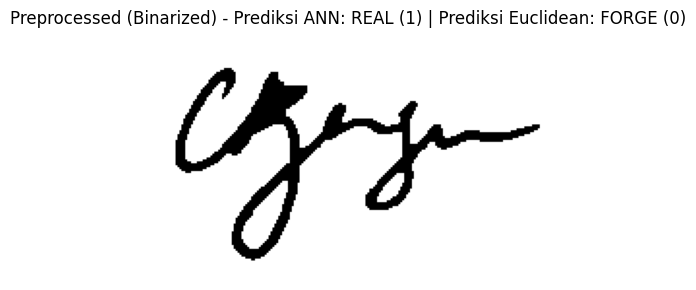

In [19]:
def predict_image_from_path(image_path, pca, model, train_features, train_labels):
    # Load gambar
    image = cv2.imread(image_path)
    if image is None:
        print(f"Gagal memuat gambar dari path: {image_path}")
        return

    results = preprocess_signature(image)
    bin_img = results['7. Binarized']
    bin_img_resized = cv2.resize(bin_img, (128, 64))

    hog_feat = hog(bin_img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2),orientations=9, block_norm='L2-Hys', visualize=False)
    moments = cv2.moments(bin_img_resized)
    hu_moments = cv2.HuMoments(moments).flatten()
    hu_moments = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10)
    combined_feat = np.concatenate([hog_feat, hu_moments])
    combined_feat_pca = pca.transform([combined_feat])

    ann_klasifikasi= model.predict(combined_feat_pca).round().flatten()[0]
    ann_label = "REAL (1)" if ann_klasifikasi== 1 else "FORGE (0)"

    euclidean_klasifikasi = classify_signature(train_features, train_labels, [combined_feat])
    euclidean_label = "REAL (1)" if euclidean_klasifikasi[0] == 1 else "FORGE (0)"

    print(f"\nPath gambar: {image_path}")
    print(f"Hasil Prediksi ANN: {ann_label}")
    print(f"Hasil Prediksi Euclidean: {euclidean_label}")

    plt.imshow(bin_img, cmap='gray')
    plt.title(f'Preprocessed (Binarized) - Prediksi ANN: {ann_label} | Prediksi Euclidean: {euclidean_label}')
    plt.axis('off')
    plt.show()

train_features = [extract_features(img) for img in real_signatures_preprocessed + forge_signatures_preprocessed]
train_labels = [1] * len(real_signatures_preprocessed) + [0] * len(forge_signatures_preprocessed)

input_path = r"D:/TUGAS KAMPUS SEMESTER 4/PENGOLAHAN CITRA DIGITAL/PROYEK AKHIR PCD/DATA SET PCD/TEST DATA/real/NFI-00405004.png"
predict_image_from_path(input_path, pca, model, train_features, train_labels)
